### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [92]:
# Step 1: Import the data from the "weather_data.csv" file

df = pd.read_csv("weather_classification_data.csv")

In [93]:
# Step 2: Display the number of rows and columns in the dataset

df.shape

(13200, 11)

In [94]:
# Step 3: Display the first few rows of the dataset to understand its structure.

df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


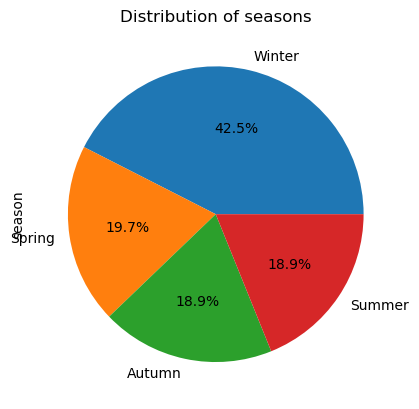

In [14]:
# Step 4: Visualize the distribution of key features
# Visualize season using a pie chart

df.season.value_counts().plot(kind='pie', autopct = '%1.1f%%', title ='Distribution of seasons')
plt.show()

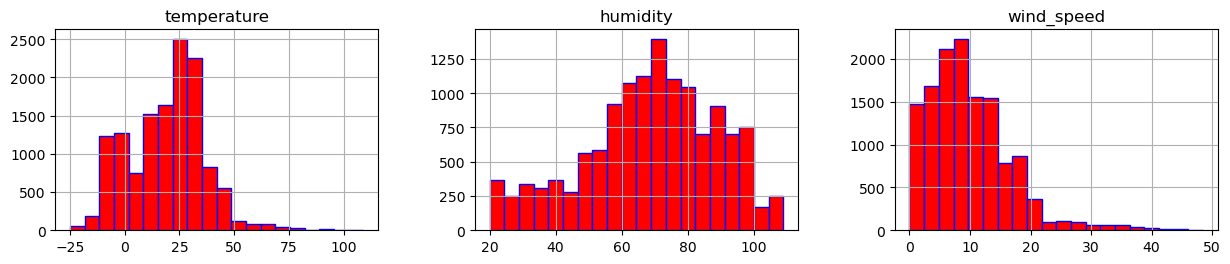

In [35]:
# Visualize temperature, humidity, and wind_speed using histograms
df[['temperature', 'humidity', 'wind_speed']].hist(bins=20,figsize=(15,6),layout=(2,3), color='red',edgecolor="blue",linewidth=1)
plt.show()

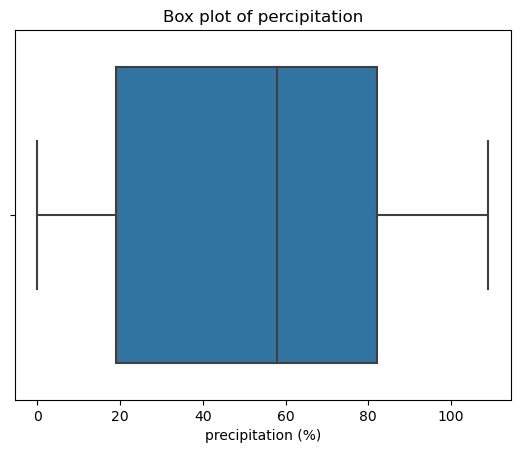

In [43]:
# Visualize precipitation (%) using a box plot
sns.boxplot(x='precipitation (%)', data=df)
plt.title("Box plot of percipitation")
plt.show()

### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [46]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.

df= pd.get_dummies(df,columns=['cloud_cover','location','season'], drop_first=True)
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,14,73,9.5,82,1010.82,2,3.5,Rainy,0,0,1,1,0,0,0,1
1,39,96,8.5,71,1011.43,7,10.0,Cloudy,0,0,1,1,0,1,0,0
2,30,64,7.0,16,1018.72,5,5.5,Sunny,0,0,0,0,1,1,0,0
3,38,83,1.5,82,1026.25,7,1.0,Sunny,0,0,0,0,0,1,0,0
4,27,74,17.0,66,990.67,1,2.5,Rainy,0,1,0,0,1,0,0,1


In [48]:
# Step 2: Scale the numerical features

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
numerical_features=['temperature','humidity','wind_speed','precipitation (%)','atmospheric_pressure','uv_index','visibility (km)']
df[numerical_features] = scale.fit_transform(df[numerical_features])

In [50]:
# Step3: Display the first few rows of the updated dataset.

df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,0,0,1,1,0,0,0,1
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,0,0,1,1,0,1,0,0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,0,0,0,0,1,1,0,0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,0,0,0,0,0,1,0,0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,0,1,0,0,1,0,0,1


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [53]:
# Step 1: Select features and target variable

X = df.drop('weather_type', axis=1)
y = df['weather_type']

In [52]:
# Step 2: Split the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
# Step 3: Train SVM with linear kernel

from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [55]:
# Step 4: Print accuracy score

print("The accuracy score of the linear svc model is", model_linear.score(X_test,y_test))

The accuracy score of the linear svc model is 0.8845959595959596


In [56]:
# Step 5: Evaluate the model
#classification report

from sklearn.metrics import classification_report
y_pred = model_linear.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      Cloudy       0.86      0.84      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [59]:
classes = df['weather_type'].unique()
classes

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

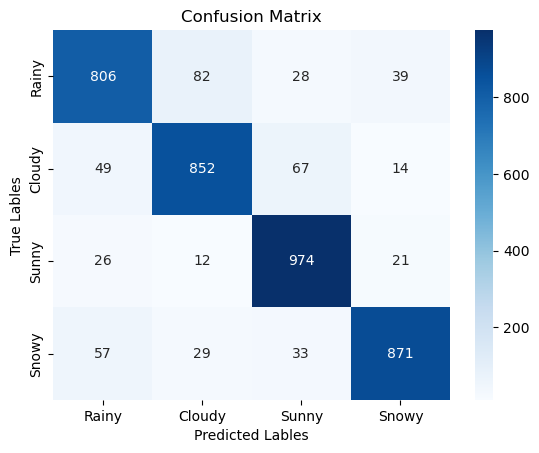

In [65]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
sns.heatmap(cn,xticklabels=classes,yticklabels=classes,fmt='d',cmap="Blues",annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Lables")
plt.ylabel("True Lables")
plt.show()

### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [66]:
# Step 1: Train SVM with RBF kernel

from sklearn.svm import SVC
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)

SVC()

In [68]:
# Step 2: Print accuracy score

print("The accuracy score of the svm RBF kernal model is",model_linear.score(X_test,y_test))

The accuracy score of the svm RBF kernal model is 0.8845959595959596


In [69]:
# Step 3: Evaluate the model
#classification report

from sklearn.metrics import classification_report
y_pred = model_rbf.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.94      0.94      0.94      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



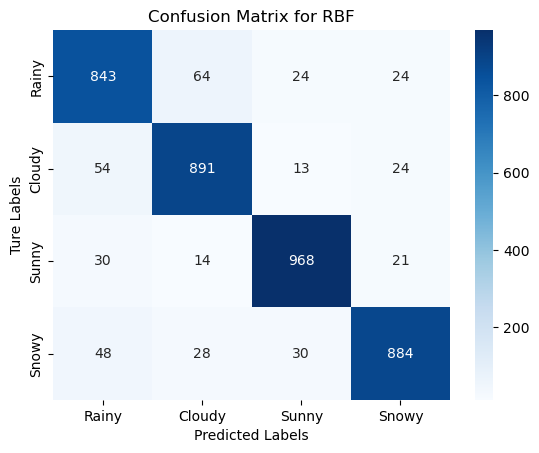

In [73]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True,xticklabels=classes,yticklabels=classes,cmap='Blues',fmt='d')
plt.title("Confusion Matrix for RBF")
plt.xlabel("Predicted Labels")
plt.ylabel("Ture Labels")
plt.show()

### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [74]:
# Step 1: Train the SVM model with specified hyperparameters

from sklearn.svm import SVC
model_svc_parm = SVC(C=0.5,gamma='auto',kernel='rbf',degree=2)
model_svc_parm.fit(X_train,y_train)

SVC(C=0.5, degree=2, gamma='auto')

In [75]:
# Step 2: Print the model's accuracy score

print("The accuracy score of the svm RBF kernal model with params is",model_svc_parm.score(X_test,y_test))

The accuracy score of the svm RBF kernal model with params is 0.898989898989899


In [76]:
# Step 3: Make predictions on the test set

y_pred_parms = model_svc_parm.predict(X_test)

In [77]:
# Step 4: Evaluate the model using a classification report and confusion matrix
#classification report

from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_test,y_pred_parms)
print(report)

              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



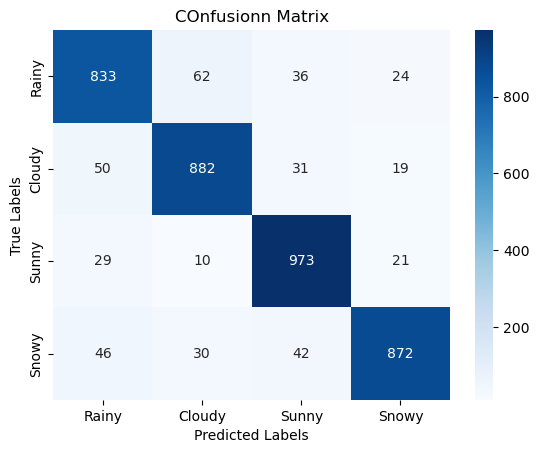

In [79]:
#confusion matrix

cn = confusion_matrix(y_test,y_pred_parms)
sns.heatmap(cn,annot=True,xticklabels=classes,yticklabels=classes,fmt='d', cmap='Blues')
plt.title("COnfusionn Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

In [85]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])


In [86]:
# Fit the pipeline on the training data

pipeline.fit(X_train,y_train)


Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC())])

In [87]:
# Make predictions using the pipeline on the test data

y_pred_pipeline = pipeline.predict(X_test)


In [88]:
# Print the classification report for the pipeline model

from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_pipeline)
print(report)

              precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.92      0.94      0.93      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



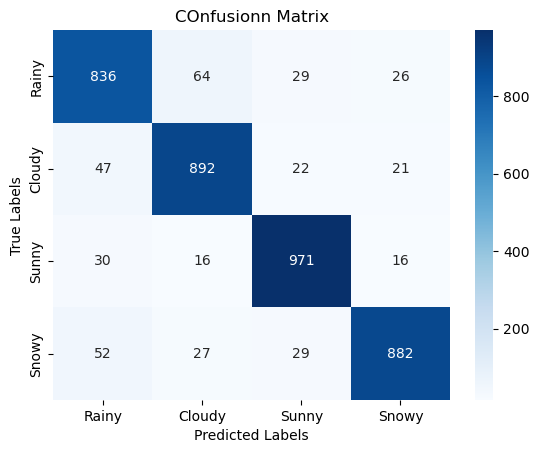

array([[836,  64,  29,  26],
       [ 47, 892,  22,  21],
       [ 30,  16, 971,  16],
       [ 52,  27,  29, 882]], dtype=int64)

In [90]:
# Print the confusion matrix for the pipeline model
cn = confusion_matrix(y_test,y_pred_pipeline)
sns.heatmap(cn,annot=True,xticklabels=classes,yticklabels=classes,fmt='d',cmap="Blues")
plt.title("COnfusionn Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
cn

### Conclusion

1. **SVM with Linear Kernel:**
   - Accuracy: 0.8845
   - Provides a good baseline but struggles with complex relationships.

2. **SVM with RBF Kernel:**
   - Accuracy: 0.9055
   - Shows significant improvement, handling non-linear patterns effectively.

3. **Custom SVM Model:**
   - Accuracy: 0.8989
   - Performs well with specified hyperparameters, demonstrating the importance of tuning.

The RBF kernel SVM achieves the highest accuracy, making it the best choice for weather type classification. 